## 캐글 타이타닉
- Reference: https://www.kaggle.com/competitions/titanic/overview

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 불러오기
train = pd.read_csv('../../data/titanic_train.csv')
test = pd.read_csv('../../data/titanictest.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Name 
- feature에서 Mrs, Mr와 같은 성별을 나타내는 단어는 결과물에 영향을 줄 것이라고 판단
- 정규표현식을 통해 "." 전까지의 영어 대소문자가 1개 이상인 그룹을 캡쳐; "\."는 마침표 리터럴 
- `expand`: `extract()`의 결과값을 반활할 때, `True`이면 `DataFrame`으로 반환, `False`이면 `Series`로 반환

In [2]:
train_test_data = [train, test] # train과 test 데이터셋을 하나로 묶어서 한번에 변환 

for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [3]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

## Title mapping
- Mr: 0
- Miss: 1
- Mrs: 2
- Others: 3

In [4]:
title_mapping = {'Mr':0,"Miss":1, "Mrs":2,"Master":3,"Dr":3,"Rev":3,
                 "Mile":3, "Major": 3, "Col": 3, "Countess": 3, "Capt" : 3, "Ms": 3,
                 "Sir" : 3, "Lady" : 3, "Mme" : 3, "Don" : 3, "Jonkheer" : 3}

for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [6]:
# 시각화 함수 정의 
def bar_chart(feature):
  # 매개변수로 받은 feature의 생존자 분포 
  survived = train[train["Survived"] == 1][feature].value_counts() 
  dead = train[train['Survived'] == 0][feature].value_counts()
  df = pd.DataFrame([survived, dead]) # survived와 dead에 대한 새로운 데이터프레임 생성
  df.index = ['Survived', "Dead"]
  # stacked: 누적 막대 그래프 
  # df.plot으로 바로 시각화, 여기서는 matplotlib 사용 X 
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5))

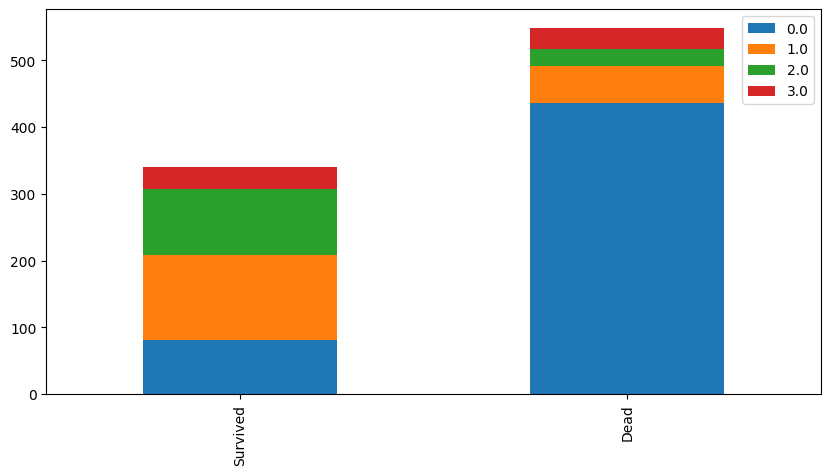

In [7]:
bar_chart('Title')

In [8]:
## 위 feature engineeing에서 title feature가 모델이 성별(Mr. , Mrs.)에 따른 Survived와 Dead를 잘 이해할만한 feature 생성
## 따라서 기존의 Name feature는 제거
train.drop("Name", axis = 1, inplace = True)
test.drop("Name", axis = 1, inplace = True)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


## Sex

In [10]:
sex_mapping = {'male' : 0, "female" : 1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

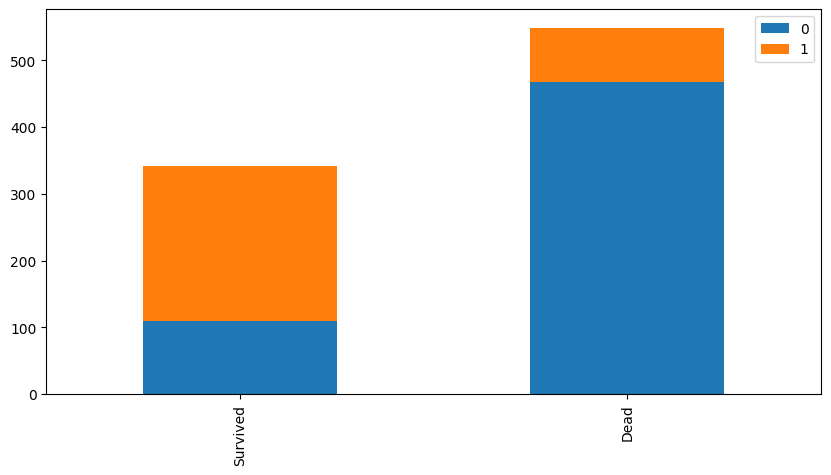

In [11]:
bar_chart('Sex')
# 시각화 결과 확실히 여성보다 남성의 생존율이 낮은 것을 확인할 수 있음

## Age
- 미리 만들었던 "Title"을 활용하여 결측치를 처리
  - 만약 어떤 남성의 나이가 NaN이라면 남성의 평균 나이를 구한 후 `fillna()`

In [12]:
train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [13]:
train['Age'].isnull().sum()

177

In [14]:
train['Age'].fillna(train.groupby('Title')['Age'].transform("median"), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform("median"), inplace = True)

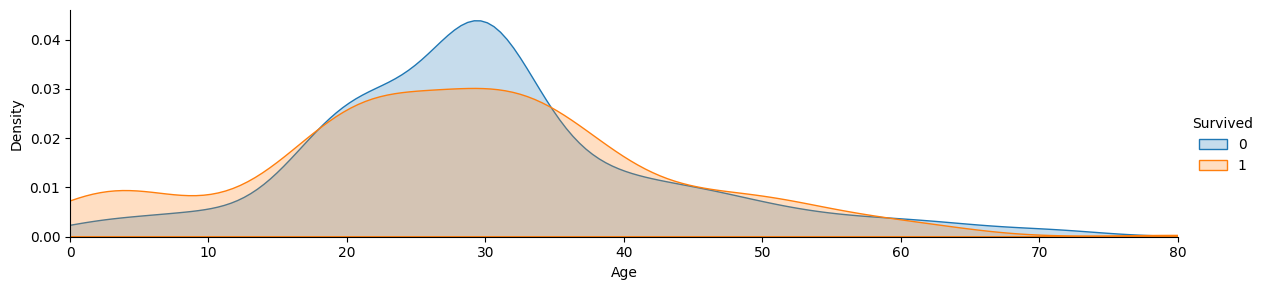

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

facet = sns.FacetGrid(train, hue = "Survived" ,aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.show()

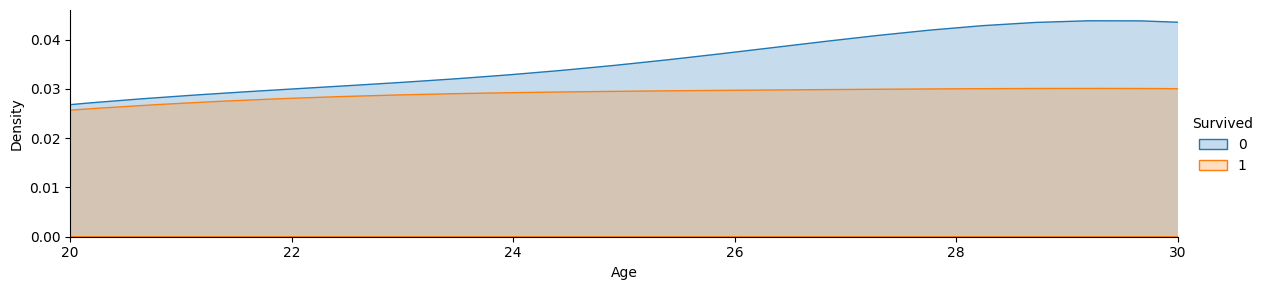

In [16]:
facet = sns.FacetGrid(train, hue = "Survived" ,aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30) # 20 ~ 30세의 생존율 확인

plt.show()

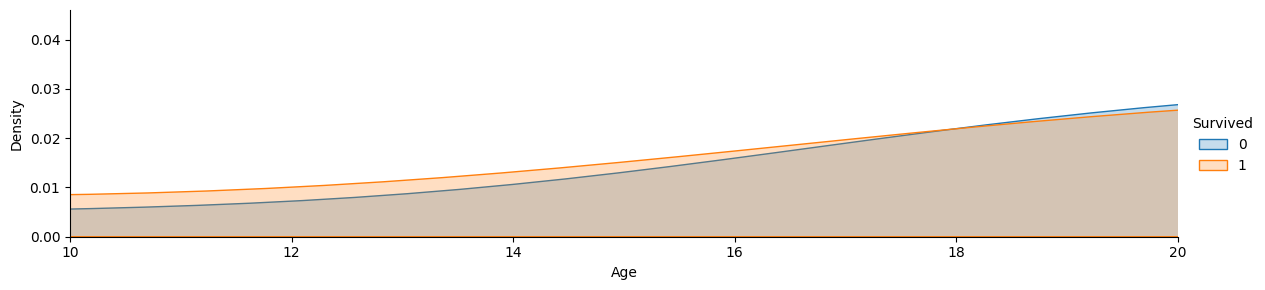

In [17]:
facet = sns.FacetGrid(train, hue = "Survived" ,aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()
plt.xlim(10, 20)

plt.show()

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        417 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


## Binning 

feature vector map:
- child: 0
- young: 1
- adult: 2
- mid-age: 3
- senior: 4

In [20]:
# for dataset in train_test_data:
#   dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
#   dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
#   dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
#   dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#   dataset.loc[dataset['Age'] > 62, 'Age'] = 0,

In [21]:
bins = [0, 16, 26, 36, 62, float('inf')] # 나이 구간 정의, 마지막 구간은 무한대로 정의
labels = [0,1,2,3,4]

for dataset in train_test_data:
  dataset['Age'] = pd.cut(dataset['Age'], bins = bins, labels = labels, right = True)
  dataset['Age'] = dataset['Age'].astype(int) # 라벨이 카테고리로 나오므로 정수형으로 변환

c:\Users\user\anaconda3\envs\torchenv\lib\site-packages\pandas\core\arrays\categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


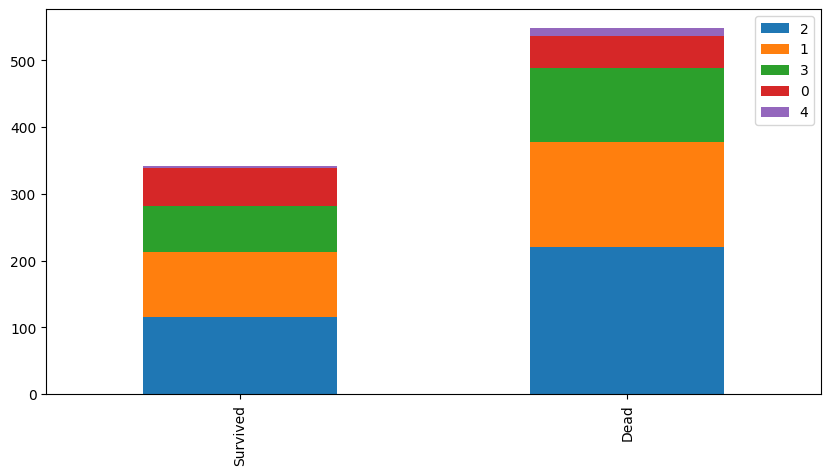

In [22]:
bar_chart("Age")

## Embarked

In [23]:
embarked_mapping = {"S": 0, "C":1, "Q":2}

for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [24]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform("median"), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform("median"), inplace = True)

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64

In [26]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            1
dtype: int64

In [27]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

<AxesSubplot:>

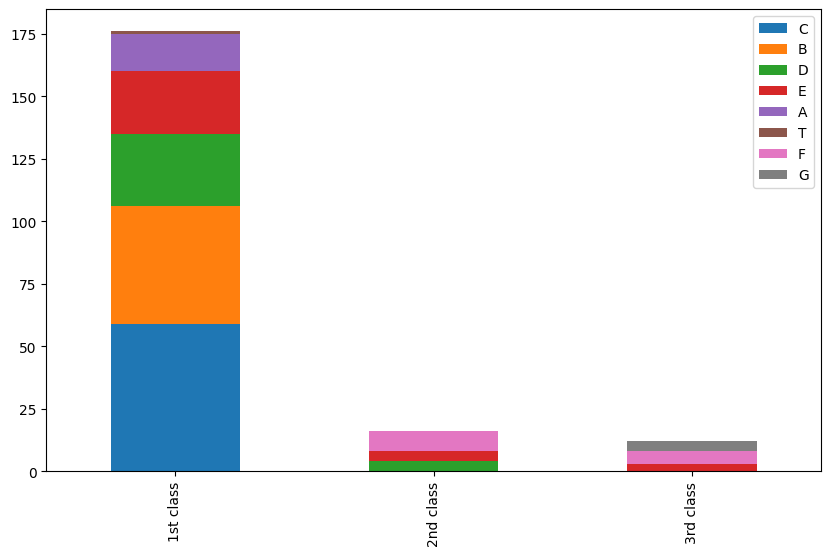

In [28]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1] # 가장 앞 알파벳만 추출

# Pclass에 따른 Cabin 분포 시각화 
Pclass1 = train[train["Pclass"] == 1]['Cabin'].value_counts()
Pclass2 = train[train["Pclass"] == 2]['Cabin'].value_counts()
Pclass3 = train[train["Pclass"] == 3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind = 'bar', stacked = True, figsize = (10,6))

In [29]:
for dataset in train_test_data:
    # 임의의 값으로 결측치 채우기
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')

    # 첫 글자만 추출 (Deck 정보)
    dataset['Deck'] = dataset['Cabin'].map(lambda x: x[0])

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for dataset in train_test_data:
    dataset['Deck'] = label.fit_transform(dataset['Deck'])

In [30]:
train.drop("Cabin", axis = 1, inplace = True)
test.drop("Cabin", axis = 1, inplace = True)

In [31]:
train['Title'].fillna(train["Title"].median(), inplace = True)
test['Title'].fillna(test["Title"].median(), inplace = True)

In [32]:
train['Embarked'].fillna(train["Embarked"].median(), inplace = True)
test['Embarked'].fillna(test["Embarked"].median(), inplace = True)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int32  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    float64
 10  Title        891 non-null    float64
 11  Deck         891 non-null    int32  
dtypes: float64(3), int32(2), int64(6), object(1)
memory usage: 76.7+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
 9   Title        418 non-null    float64
 10  Deck         418 non-null    int32  
dtypes: float64(2), int32(2), int64(6), object(1)
memory usage: 32.8+ KB


## FamilySize

In [35]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

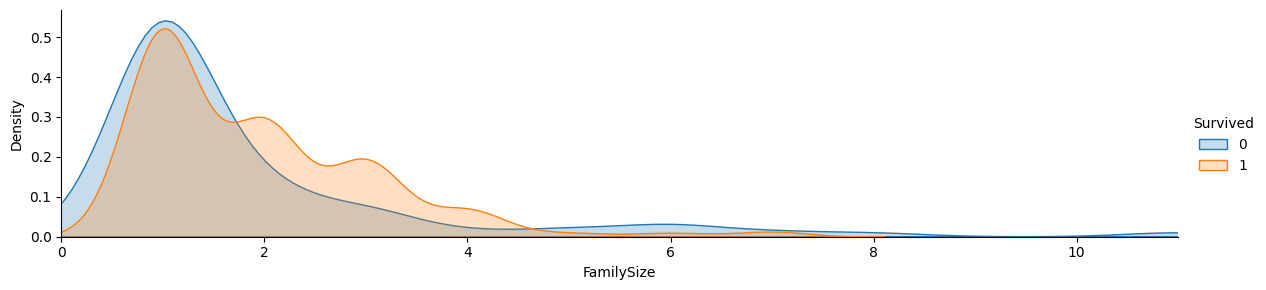

In [37]:
facet = sns.FacetGrid(train, hue = "Survived", aspect=4)
facet.map(sns.kdeplot, "FamilySize", shade = True)
facet.set(xlim = (0, train['FamilySize'].max())) # x축 범위 지정
facet.add_legend()
plt.xlim(0)

In [39]:
family_mapping = {1:0, 2:0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2., 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

for dataset in train_test_data:
  dataset["FamilySize"] = dataset['FamilySize'].map(family_mapping)

## Ticket

In [40]:
for dataset in train_test_data:
    dataset.drop(['Ticket'], axis=1, inplace=True)

In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score # 교차 검증 

kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

X = train.drop("Survived", axis = 1)
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

svc_model = SVC()

score = cross_val_score(svc_model, X_train, y_train, cv = kfold, n_jobs = 1, scoring = 'accuracy')
print(score)


[0.625      0.65277778 0.69014085 0.61971831 0.61971831 0.53521127
 0.66197183 0.74647887 0.69014085 0.64788732]


## RandomForestClassifier

In [80]:

# RandomForest 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=200, max_depth = 8, max_features='log2', random_state=42)
rf_model.fit(X_train, y_train)

# 검증 데이터로 예측
val_pred = rf_model.predict(X_val)

# 모델 성능 평가
print('검증 데이터 정확도:', accuracy_score(y_val, val_pred))
print('\n분류 보고서:')
print(classification_report(y_val, val_pred))


검증 데이터 정확도: 0.8491620111731844

분류 보고서:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



## DecisionTreeClassifier

In [43]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)

val_pred = dt_model.predict(X_val)

print('검증 데이터 정확도:', accuracy_score(y_val, val_pred))
print('\n분류 보고서:')
print(classification_report(y_val, val_pred))

검증 데이터 정확도: 0.7486033519553073

분류 보고서:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       105
           1       0.68      0.73      0.71        74

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.75      0.75      0.75       179



## RandomForestClassifier 튜닝

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
  "n_estimators":randint(100, 1000),
  'max_depth':randint(3,30),
  "min_samples_split":randint(2,20),
  "min_samples_leaf":randint(1,20),
  "max_features":['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
  estimator = rf_model,
  param_distributions = param_dist,
  n_iter = 30,
  cv = 5,
  verbose = 2,
  random_state = 42,
  n_jobs = -1 # cpu 병렬 처리 
)

random_search.fit(X_train, y_train)

print(f"Best parameters:\n{random_search.best_params_}")
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:
{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 373}


In [ ]:
best_rf.fit(X_train, y_train)

best_val = best_rf.predict(X_val)

print('검증 데이터 정확도:', accuracy_score(y_val, best_val))
print('\n분류 보고서:')
print(classification_report(y_val, best_val))
# 오히려 기본 RandomForest 보다 성능이 떨어짐

검증 데이터 정확도: 0.8268156424581006

분류 보고서:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## LightGMB 모델 

In [48]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00


In [51]:
# lightgbm 4.1 버전 이후엔 early_stopping을 따로 import 해줘야됨
from lightgbm import LGBMClassifier, early_stopping 
from scipy.stats import randint as sp_randint

eval_sets = [(X_train, y_train),(X_val, y_val)]

lgbm_wrapper = LGBMClassifier(n_estimators = 400, learning_rate = 0.05, max_depth = -1)
lgbm_wrapper.fit(X_train, y_train, callbacks = [early_stopping(stopping_rounds = 50)], eval_metric = 'logloss',eval_set = eval_sets)

lgbm_s50_pred = lgbm_wrapper.predict(X_val)

print('검증 데이터 정확도:', accuracy_score(y_val, lgbm_s50_pred))
print('\n분류 보고서:')
print(classification_report(y_val, lgbm_s50_pred))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[79]	training's binary_logloss: 0.250977	valid_1's binary_logloss: 0.423012
검증 데이터 정확도: 0.8212290502793296

분류 보고서:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



## XGBoostClassifier

In [82]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 6.7 MB/s eta 0:00:19
   - -------------------------------------- 4.7/124.9 MB 11.0 MB/s eta 0:00:11
   --- ------------------------------------ 10.5/124.9 MB 16.8 MB/s eta 0:00:07
   ----- ---------------------------------- 16.0/124.9 MB 19.7 MB/s eta 0:00:06
   ------ --------------------------------- 21.8/124.9 MB 21.5 MB/s eta 0:00:05
   -------- ------------------------------- 27.5/124.9 MB 22.7 MB/s eta 0:00:05
   ---------- ----------------------------- 33.3/124.9 MB 23.2 MB/s eta 0:00:04
   ------------ --------------------------- 39.3/124.9 MB 24.0 MB/s eta 0:00:04
   -------------- ------------------------- 45.1/124.9 MB 24.5 MB/s eta 0:00:04
   ---------------- ----------------------- 50.9/124.9 MB 24.7 MB/s eta 0:00:03
   ----------------- ---------------------- 55.6/124.9 MB 24.9 MB/s eta 0:00:03
   ------------------ --------------------- 56.9/124

## Kaggle 0.795 Score 모델

In [197]:
from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report

xgb_wrapper = XGBClassifier(
    n_estimators=200,
    learning_rate=0.07,
    max_depth=7,
    # gamma = 0.07,
    use_label_encoder=False,
    eval_metric='logloss' 
)

xgb_wrapper.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False 
)

xgb_pred = xgb_wrapper.predict(X_val)

print("검증 정확도:", accuracy_score(y_val, xgb_pred))
print("\n분류 보고서:")
print(classification_report(y_val, xgb_pred))


검증 정확도: 0.8491620111731844

분류 보고서:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



c:\Users\user\anaconda3\envs\torchenv\lib\site-packages\xgboost\core.py:158: UserWarning: [17:45:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## XGBoostClassifier 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    "n_estimators": randint(100,1000),
    "max_depth": randint(2, 20, 2),
    "learning_rate": [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.13, 0.15, 0.18],
    "subsample": [0.2, 0.4, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.4, 0.6, 0.8, 1.0]
}

xgb_wrapper = XGBClassifier()
random_search = RandomizedSearchCV(xgb_wrapper, param_distributions=params, 
                                   scoring='accuracy', n_iter=20, cv=3, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

xgb_pred = random_search.predict(X_val)
best_model = random_search.best_estimator_

print(f"best params: {random_search.best_params_}")
print("검증 정확도:", accuracy_score(y_val, xgb_pred))
print("\n분류 보고서:")
print(classification_report(y_val, xgb_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
best params: {'colsample_bytree': 0.4, 'learning_rate': 0.03, 'max_depth': 17, 'n_estimators': 110, 'subsample': 0.4}
검증 정확도: 0.8268156424581006

분류 보고서:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



## GridSearchCV로 하이퍼파리미터 튜닝 

In [135]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. 튜닝할 하이퍼파라미터 후보 목록 정의
params = {
    "n_estimators": [100,200,300,400,500],
    "max_depth": [2,4,6,8,10],
    "learning_rate": [0.01, 0.03, 0.05, 0.07, 0.09, 0.1],
    "subsample": [0.2, 0.4, 0.6, 0.8, 1.0],
    "colsample_bytree": [0.4, 0.6, 0.8, 1.0]
}

# 3. GridSearchCV 객체 생성 (5-폴드 교차검증)
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# 4. 학습 및 최적 파라미터 탐색
grid_search.fit(X_train, y_train)

print("최적 파라미터:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

print("검증 정확도:", accuracy_score(y_val, y_pred))
print("\n분류 보고서:")
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
최적 파라미터: {'colsample_bytree': 0.6, 'learning_rate': 0.07, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1.0}
검증 정확도: 0.8156424581005587

분류 보고서:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



c:\Users\user\anaconda3\envs\torchenv\lib\site-packages\xgboost\core.py:158: UserWarning: [17:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## submission 파일 생성

In [198]:
# 테스트 데이터 예측
test_pred = xgb_wrapper.predict(test)

# 제출 파일 생성
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('submission.csv', index=False)
print('\n제출 파일이 생성되었습니다.')




제출 파일이 생성되었습니다.


## PyTorch 기반 Titanic 분류 예측 모델 

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
class TitanicDataset(Dataset):
    def __init__(self, X, y=None):
        # X, y 데이터를 torch.tensor로 변환 
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long) if y is not None else None

    def __len__(self):
        return len(self.X)

    # index를 받아 해당 index의 item을 반환 
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]

In [41]:
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)  # 이진 분류 (0, 1)
        )

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.model(x)


In [57]:
# train_df = pd.read_csv('./data/train.csv')
# test_df = pd.read_csv('./data/test.csv')

# PyTorch 데이터셋에 맞게 변환 
train_dataset = TitanicDataset(pd.DataFrame(X_train), y_train)
val_dataset = TitanicDataset(pd.DataFrame(X_val), y_val)
test_dataset = TitanicDataset(pd.DataFrame(test))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:
x, label = next(iter(train_loader))
x.shape, label.shape # matmul error 디버깅 

(torch.Size([32, 10]), torch.Size([32]))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = MLPClassifier(input_dim=10).to(device)
criterion = nn.CrossEntropyLoss() # 분류 손실함수 
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습
for epoch in range(50):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        # 동일한 device로 이동 
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


cuda
Epoch 1, Loss: 15.2564
Epoch 2, Loss: 14.1834
Epoch 3, Loss: 12.6241
Epoch 4, Loss: 11.3552
Epoch 5, Loss: 10.3571
Epoch 6, Loss: 9.7109
Epoch 7, Loss: 9.4821
Epoch 8, Loss: 9.5123
Epoch 9, Loss: 9.1703
Epoch 10, Loss: 9.3063
Epoch 11, Loss: 9.2001
Epoch 12, Loss: 9.1707
Epoch 13, Loss: 8.9510
Epoch 14, Loss: 8.9225
Epoch 15, Loss: 9.0300
Epoch 16, Loss: 8.8625
Epoch 17, Loss: 9.1572
Epoch 18, Loss: 8.8854
Epoch 19, Loss: 8.8089
Epoch 20, Loss: 8.6019
Epoch 21, Loss: 8.6853
Epoch 22, Loss: 8.5325
Epoch 23, Loss: 9.0856
Epoch 24, Loss: 8.9515
Epoch 25, Loss: 8.8469
Epoch 26, Loss: 8.4226
Epoch 27, Loss: 8.5959
Epoch 28, Loss: 8.7012
Epoch 29, Loss: 8.3819
Epoch 30, Loss: 8.2574
Epoch 31, Loss: 8.4648
Epoch 32, Loss: 8.4018
Epoch 33, Loss: 8.3019
Epoch 34, Loss: 8.6011
Epoch 35, Loss: 8.1066
Epoch 36, Loss: 8.3576
Epoch 37, Loss: 8.4462
Epoch 38, Loss: 8.1436
Epoch 39, Loss: 8.3372
Epoch 40, Loss: 8.3034
Epoch 41, Loss: 8.0601
Epoch 42, Loss: 8.0493
Epoch 43, Loss: 8.3738
Epoch 44, 

In [60]:
model.eval()
all_preds = []
all_labels = []

with torch.inference_mode():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.numpy())

print("검증 정확도:", accuracy_score(all_labels, all_preds))
print("\n분류 보고서:\n", classification_report(all_labels, all_preds))


검증 정확도: 0.8324022346368715

분류 보고서:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [63]:
test_loader = DataLoader(test_dataset, batch_size=32)
test_preds = []

model.eval()
with torch.inference_mode():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        test_preds.extend(preds)

# 예측 결과 DataFrame 저장
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_preds
})
submission.to_csv('submission.csv', index=False)
print(f"submission 저장 완료")


submission 저장 완료
